<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#MLP-w-scikit-learn" data-toc-modified-id="MLP-w-scikit-learn-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>MLP w scikit-learn</a></span></li><li><span><a href="#Dane:-dwa-księżyce" data-toc-modified-id="Dane:-dwa-księżyce-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Dane: dwa księżyce</a></span></li><li><span><a href="#Trening-sieci-MLP" data-toc-modified-id="Trening-sieci-MLP-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Trening sieci MLP</a></span></li><li><span><a href="#Granica-decyzyjna" data-toc-modified-id="Granica-decyzyjna-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Granica decyzyjna</a></span></li><li><span><a href="#Granica-decyzyjna" data-toc-modified-id="Granica-decyzyjna-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Granica decyzyjna</a></span></li><li><span><a href="#Wagi-sieci" data-toc-modified-id="Wagi-sieci-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Wagi sieci</a></span></li><li><span><a href="#Wizualizacja-wag" data-toc-modified-id="Wizualizacja-wag-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Wizualizacja wag</a></span></li><li><span><a href="#Przeuczenie:-kiedy-zakończyć-trening?" data-toc-modified-id="Przeuczenie:-kiedy-zakończyć-trening?-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Przeuczenie: kiedy zakończyć trening?</a></span></li><li><span><a href="#Poprawność-na-zbiorze-walidacyjnym" data-toc-modified-id="Poprawność-na-zbiorze-walidacyjnym-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Poprawność na zbiorze walidacyjnym</a></span></li><li><span><a href="#Ćwiczenie" data-toc-modified-id="Ćwiczenie-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Ćwiczenie</a></span></li><li><span><a href="#Wpływ-wsp.-momentu" data-toc-modified-id="Wpływ-wsp.-momentu-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Wpływ wsp. momentu</a></span></li><li><span><a href="#Wpływ-regularyzacji-L2" data-toc-modified-id="Wpływ-regularyzacji-L2-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Wpływ regularyzacji L2</a></span></li><li><span><a href="#Wpływ-typu-neuronu" data-toc-modified-id="Wpływ-typu-neuronu-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Wpływ typu neuronu</a></span></li><li><span><a href="#Ocena-generalizacji:-walidacja-krzyżowa" data-toc-modified-id="Ocena-generalizacji:-walidacja-krzyżowa-14"><span class="toc-item-num">14&nbsp;&nbsp;</span>Ocena generalizacji: walidacja krzyżowa</a></span></li><li><span><a href="#Pełna-procedura-CV-w-scikit-learn" data-toc-modified-id="Pełna-procedura-CV-w-scikit-learn-15"><span class="toc-item-num">15&nbsp;&nbsp;</span>Pełna procedura CV w scikit-learn</a></span></li><li><span><a href="#Strojenie-parametrów:-przeszukiwanie-siatką" data-toc-modified-id="Strojenie-parametrów:-przeszukiwanie-siatką-16"><span class="toc-item-num">16&nbsp;&nbsp;</span>Strojenie parametrów: przeszukiwanie siatką</a></span></li><li><span><a href="#Zadanie:-wykrywanie-raka-piersi-(Wisconsin-Diagnostic-Breast-Cancer)" data-toc-modified-id="Zadanie:-wykrywanie-raka-piersi-(Wisconsin-Diagnostic-Breast-Cancer)-17"><span class="toc-item-num">17&nbsp;&nbsp;</span>Zadanie: wykrywanie raka piersi (Wisconsin Diagnostic Breast Cancer)</a></span></li></ul></div>

## MLP w scikit-learn

* [sklearn.neural_network.MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)
* [sklearn.neural_network.MLPRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html)

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()
mlp.get_params()

## Dane: dwa księżyce

In [ ]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

N = 250
X, y = make_moons(N, noise=0.2, random_state=42)
print(X.shape)
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.show()

## Trening sieci MLP

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes = (10, 10), 
                    activation='tanh',        
                    solver='sgd',             
                    learning_rate_init=0.1,   # wsp. uczenia
                    batch_size=5,          
                    max_iter=100, 
                    momentum=0.0,             # wsp. ,o,emtu
                    alpha=0.0,                # wsp. regularyzacji L2
                    early_stopping=False, 
                    random_state=42) 

mlp.fit(X, y)

print('Train accuracy: ', mlp.score(X, y))
print('Train loss    : ', mlp.best_loss_)
plt.plot(mlp.loss_curve_)
plt.title('Training loss')
plt.xlabel('Iterations')
plt.show()

## Granica decyzyjna


In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# Funkcja rysująca granice decyzyjne klasyfikatora dla danych 2D zaczerpnięta z: 
# https://github.com/rasbt/python-machine-learning-book/blob/master/code/optional-py-scripts/ch03.py

def plot_decision_regions(X, y, classifier, test_data=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 'o', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_data:
        # plot all examples
        X_test, y_test = test_data

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='s',
                    s=100, 
                    label='test set')

## Granica decyzyjna

In [ ]:
plot_decision_regions(X=X, y=y, classifier=mlp)
plt.show();

## Wagi sieci 

In [ ]:
for w, b in zip(mlp.coefs_, mlp.intercepts_):
    print('Warstwa ')
    print(' W ', w.shape)
    print(' b ', b.shape)

## Wizualizacja wag

* ``coefs_[]`` lista macierzy wag miedyz warstwami
* ``intercepts_[]`` lista wektorów wyrazów wolnych


In [ ]:
f, axs = plt.subplots(2, len(mlp.coefs_), figsize=(15,5))
i=0
for w, b in zip(mlp.coefs_, mlp.intercepts_):
    axs[0, i].matshow(w)
    axs[0, i].set_title(f'Warstwa {i+1}, W: {w.shape}, b: {b.shape}')
    axs[1, i].matshow(b[np.newaxis, :])
    i = i + 1
plt.show()

## Przeuczenie: kiedy zakończyć trening?

Wyłaczmy mechanizm wczesnego zatrzymania: ``n_iter_no_change=1500`` powoduje zatrzymanie uczenia jeśli poprawność na zb. walidacyjnym  (domyślnie 10% danych) nie wzrasta


In [ ]:
mlp = MLPClassifier(hidden_layer_sizes = (10, 10), activation='tanh', solver='sgd', alpha=0.0, 
                    batch_size=5, 
                    learning_rate_init=0.1,
                    max_iter=1500, 
                    momentum=0.0,
                    n_iter_no_change=1500, 
                    early_stopping=False, 
                    random_state=42) 

mlp.fit(X, y)
print('Train accuracy: ', mlp.score(X, y))
print('Train loss    : ', mlp.best_loss_)
plt.plot(mlp.loss_curve_)
plt.title('Training loss')
plt.xlabel('Iterations')
plt.show()

In [ ]:
plot_decision_regions(X=X, y=y, classifier=mlp)
plt.show();

## Poprawność na zbiorze walidacyjnym

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes = (10, 10), activation='tanh', solver='sgd', alpha=0.0, 
                    batch_size=5, 
                    learning_rate_init=0.1,
                    max_iter=1000, 
                    momentum=0.0,
                    n_iter_no_change=1000, 
                    early_stopping=True,
                    validation_fraction=0.2,
                    random_state=42) 

mlp.fit(X, y)
print('Train accuracy: ', mlp.score(X, y))
print('Train loss    : ', mlp.loss_)
f, axs = plt.subplots(1, 2, figsize=(15,5))
axs[0].plot(mlp.loss_curve_)
axs[0].set_title('Training loss')
axs[1].plot(mlp.validation_scores_)
axs[1].set_title('Validation accuracy')
plt.show()

## Ćwiczenie

Porównanie wpływu parametrów na trening:
* **moment**: porównaj na wykresie przebieg funkcji kosztu dla rónych wartosic wsp. momentu od 0 do 1  
* **regularyzacja L2**: porównaj granice decyzyjne uzyskiwane przy róznych wartościach wsp. ``alpha`` od 0 do 1.  
Porównaj rozkład wartości wag dla silnej i słabej regularyzacji (np. sporządź histogram)
* **funkcja aktywacji**: porównaj wyniki (poprawność i granice decyzji) dla funkcji aktywacji ``tanh``, ``logistic``, ``relu``

## Wpływ wsp. momentu

Przykładowa konfiguracja do testu:

```python
MLPClassifier(hidden_layer_sizes = (10, 10), activation='tanh', 
              solver='sgd', alpha=0.0, learning_rate_init=0.01, 
              batch_size=20, max_iter=100, n_iter_no_change=100, 
              early_stopping=False, random_state=42) 

```



## Wpływ regularyzacji L2


Przykładowa konfiguracja do testów
```python
MLPClassifier(hidden_layer_sizes = (10, 10), 
              activation='tanh', solver='sgd', 
              batch_size=5, learning_rate_init=0.1,
              max_iter=1000, momentum=0.0,
              n_iter_no_change=1000, 
              early_stopping=False,
              random_state=42) 

```


## Wpływ typu neuronu

## Ocena generalizacji: walidacja krzyżowa 


Walidacja krzyżowa (*cross validation*) polega na podziale zbioru na $k$ równoliczne części. Następnie każda z tych części jest w kolejnych krokach używana w roli zbioru testowego a pozostałe $k-1$ części służy za zbiór treningowy. Często dokonuje się podziału na 10 części, mówimy wówczas o 10-cio krotnej walidacji krzyżowej.

<div>
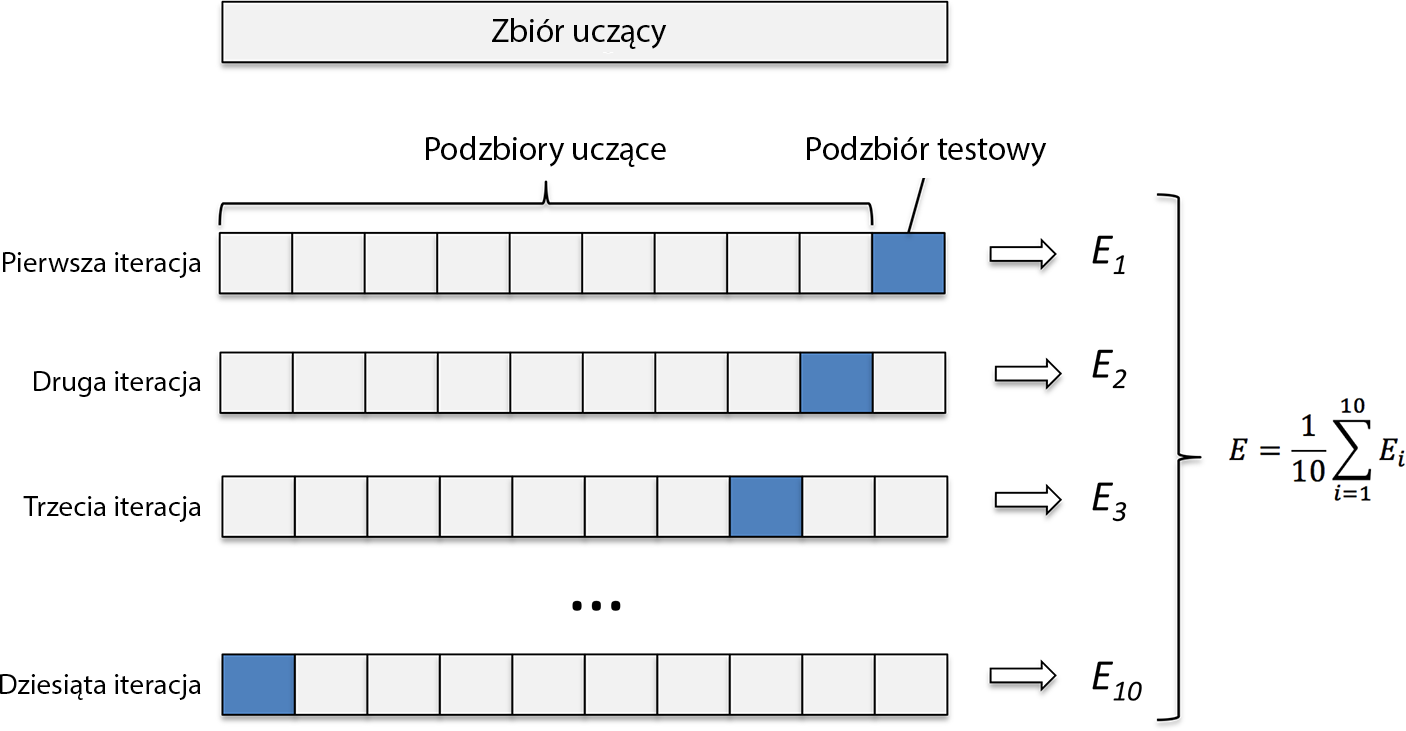
</div>

Rzetelne oszacowanie miary uzyskujemy uśredniając wyniki ze wszystkich $k$ podziałów. W ten sposób gwarantujemy, że modele są zawsze oceniane na zbiorze, który nie był użyty do treningu a dodatkowo każdy przypadek został też użyty do testowania w jednym z foldów.

## Pełna procedura CV w scikit-learn

Funkcja [sklearn.model_selection.cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) pozwala zautomatyzować procedurę CV. 

```python
sklearn.model_selection.cross_val_score(estimator, X, y=None, cv=None, n_jobs=None)
```

In [ ]:
from sklearn.model_selection import cross_val_score

mlp = MLPClassifier(solver='sgd')

scores = cross_val_score(estimator=mlp, X=X, y=y, cv=10, n_jobs=4)

for i, score in enumerate(scores):
    print('Fold %d, Poprawność: %.3f' % (i+1, score))

print('Średnia poprawność CV : %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

## Strojenie parametrów: przeszukiwanie siatką



Klasa [sklearn.model_selection.GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) pozwala zautomatyzować proces strojenia parametrów z użyciem walidacji krzyżowej. Uruchamia on walidację krzyżową dla danego modelu wielokrotnie z użyciem wszystkich kombinacji parametrów zdefiniowanych w słowniku przekazanym w argumencie `param_grid`. 

```python
sklearn.model_selection.GridSearchCV(estimator, param_grid, n_jobs=None, refit=True, cv=None)
```

Wynikowy obiekt jest estymatorem, posiada metody ``fit()`` i ``predict()``.

In [ ]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

mlp_gs = MLPClassifier(max_iter=100, solver='sgd')

param_grid = {
    'hidden_layer_sizes': [ [2], [5], [10], [50], [100] ]
}

gs = GridSearchCV(estimator=mlp_gs, param_grid=param_grid, cv=4);
gs = gs.fit(X, y)

In [ ]:
print('Największa poprawność: %.3f' % gs.best_score_)
print('Najlepszy zestaw parametrów: %s' % str(gs.best_params_))
display(gs.best_estimator_)

Pole `cv_results_` zawiera szczegółowe wyniki procedury szukania siatką wraz z ostatecznym rankingiem klasyfikatorów.
Dane umieszczone są w słowniku, który idealnie nadaje się do zainicjowania tabeli `DataFrame`. Każdy wiersz zawiera wyniki dla innej wartości parametru `max_depth`.

In [ ]:
import pandas as pd

df = pd.DataFrame(gs.cv_results_)
df

In [ ]:
df.plot.barh(x='params', y='mean_test_score', xerr='std_test_score',  capsize=4);

Procedura przeszukiwania siatką pozwala na jednoczesne strojenie większej liczby parametrów, dla każdego parametru określamy też zakres przeszukiwanych wartości. Wówczas procedura tworzy ranking modeli zbudowanych dla wszystkich możliwych kombinacji zadanych wartości parametrów.

<div>
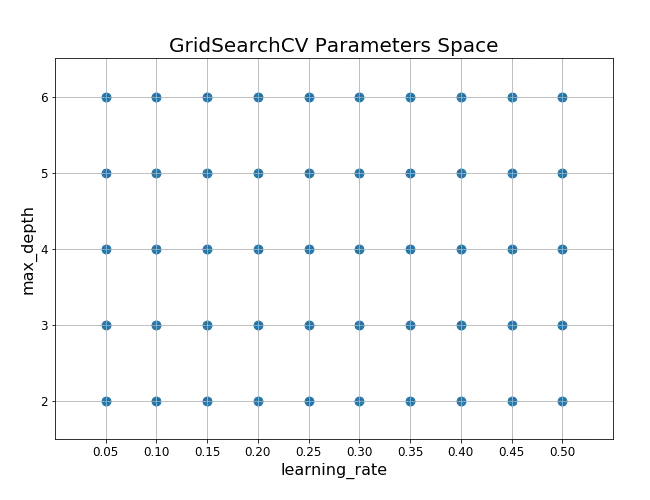
</div>


In [ ]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

mlp_gs = MLPClassifier(max_iter=1000, solver='sgd')

param_grid = {
    'hidden_layer_sizes': [ (10, ), (5, 2) ],
    'activation' : ['relu', 'tanh']
}

gs = GridSearchCV(estimator=mlp_gs, param_grid=param_grid, cv=5);
gs = gs.fit(X, y)

print('Największa poprawność: %.3f' % gs.best_score_)
print('Najlepszy zestaw parametrów: %s' % str(gs.best_params_))
display(gs.best_estimator_)

In [ ]:
df = pd.DataFrame(gs.cv_results_)
df.plot.barh(x='params', y='mean_test_score', xerr='std_test_score',  capsize=4, legend=False);

## Zadanie: wykrywanie raka piersi (Wisconsin Diagnostic Breast Cancer)

Znajdź najlepszy model klasyfikacji MLP zrealizowany za pomocą klasy ``MLPClassifier`` wykrywający złośliwe przypadki raka piersi w danych `WDBC`. Dane można wczytać za pomocą funkcji [sklearn.datasets.load_breast_cancer()](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html).


```python
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data['data']
y = data['target']
```

Dane zawierają wyniki badań 569 pacjentów z rakiem piersi. Każdy przypadek opisany jest 30 ciągłymi atrybutami. Dane podzielone są na dwie klasy: 0 to grupa nowotworów łagodnych (`malignat`), wartość 1 to nowotwory złośliwe (`benign`). 

1. Podziel zbiór na część treningową zawierającą piersze 400 przypadków oraz część testową zawierjącą pozostałe przypadki
2. Kożystając **wyłacznie ze zbioru treningowego** zbuduj model klasyfikacji MLP dobierając parametry sieci neuronowej.  Spróbuj wykorzystać do tego celu mechanizm strojenia parametrów poprzez przeszukiwanie siatką (`GridSearchCV`). Wykonaj strojenie parametrów dla przynajmniej 3 z podanych poniżej:
    * ilość warstw i ilość neuronów  w warstwach
    * stałą uczenia
    * typ funkcji aktywacji
    * współczynnik reglaryzacji L2
    * wspólczynnik momentu
    * wielkość paczki
3. Oceń skuteczność klasyfikacji uzyskanego modelu na **zbiorze testowym**. 

In [ ]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data['data']
y = data['target']

print(X.shape)






